### Translate fasta containing amino acid sequences to comma-free code:

In [17]:
from Bio import SeqIO
from scipy.spatial.distance import hamming
import itertools
from random import sample
import matplotlib.pyplot as plt
from tqdm import tqdm

TQDM_BAR_FORMAT = (
    "{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]"
)

%load_ext blackcellmagic
%config InlineBackend.figure_format='retina'

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [18]:
# comme-free code AA dictionary
cfcode = {
    "F": "ACC",
    "L": "ACA",
    "I": "ATA",
    "M": "ATC",
    "V": "ATT",
    "S": "CTA",
    "P": "CTC",
    "T": "CTT",
    "A": "AGA",
    "Y": "AGC",
    "H": "AGT",
    "Q": "AGG",
    "N": "CGA", 
    "K": "CGC",
    "D": "CGT",
    "E": "CGG",
    "C": "TGA",
    "W": "TGC",
    "R": "TGT",
    "G": "TGG",
    "X": "NNN",  # Amino acid not known
    "B": "CGT",  # Represents either N or D - will translate as D here (N is only off by one base)
    "J": "ACA",  # Represents either L or I - will translate as L here (I is only off by one base)
    "Z": "CGG"   # Represents either E or Q - will translate as E here (Q is only off by one base)
}

In [19]:
# Also see: 
# https://www.biostars.org/p/432189/
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4253638/

dnacode = {
    "A": "GCC",
    "C": "TGC",
    "D": "GAC",
    "E": "GAG",
    "F": "TTC",
    "G": "GGC",
    "H": "CAC",
    "I": "ATC",
    "K": "AAG",
    "L": "CTG",
    "M": "ATG",
    "N": "AAC",
    "P": "CCC",
    "Q": "CAG",
    "R": "AGA",
    "S": "TCC",
    "T": "ACC",
    "V": "GTG",
    "W": "TGG",
    "Y": "TAC",
    "X": "NNN",  # Amino acid not known
    "B": "AAC",  # Represents either N or D
    "J": "CTG",  # Represents either L or I
    "Z": "GAG",  # Represents either E or Q
}

In [20]:
fasta = "/Users/lauraluebbert/OneDrive - California Institute of Technology/Pachter_lab/comma-free/palmdb/2021-03-27_rdrp1/rdrp1.fa"

ids = []
seqs = []
nn_seqs = []
cfc_seqs = []
seq_lens = []
for record in SeqIO.parse(fasta, "fasta"):
    # Translate AA sequence to comma-free
    cfc_seq_temp = []
    for aa in record.seq:
        # Capitalize amino acid
        aa = aa.capitalize()

        # Rev translate to comme-free code
        cfc_seq_temp.append(cfcode[aa])

    cfc_seqs.append("".join(cfc_seq_temp))


    # Reverse translate AA sequence using standard dna code
    nn_seq_temp = []
    for aa in record.seq:
        # Capitalize amino acid
        aa = aa.capitalize()

        # Reverse translate
        nn_seq_temp.append(dnacode[aa])

    # Standard reverse translation               
    nn_seqs.append("".join(nn_seq_temp))

    
    # Record original amino acid seq
    seqs.append(record.seq)
    # Record original sequence length
    seq_lens.append(len(record.seq))

    # Record IDs
    ids.append(record.id)

In [21]:
print(f"Number of sequences: {len(ids)}")
print(f"AA sequence lengths (min-max): {min(seq_lens)} - {max(seq_lens)}")
# Check if all IDs are unique
print("IDs are unique: ",len(ids) == len(set(ids)))
# Check if all sequences are unique
print("Sequences are unique: ", len(cfc_seqs) == len(set(cfc_seqs)))
print("Number of shared sequences: ", len(cfc_seqs) - len(set(cfc_seqs)))

Number of sequences: 14680
AA sequence lengths (min-max): 35 - 786
IDs are unique:  True
Sequences are unique:  False
Number of shared sequences:  12


Plot distances as percentage:

In [28]:
# # Define number of sequences to compare (will be randomly selected)
# n = 10000

# def get_dist_perc(seqs):
#     dist_perc = []
#     with tqdm(total=len(list(itertools.combinations(sample(seqs, n), 2))), bar_format=TQDM_BAR_FORMAT) as pbar:
#         for seq1, seq2 in itertools.combinations(sample(seqs, n), 2):
#             if len(seq1) > len(seq2):
#                 # Compute Hamming distance (returns percentage that can be converted to Hamming distance by multiplying by length of array)
#                 hamming_distance = hamming(list(seq1[:len(seq2)]), list(seq2))
#             elif len(seq2) > len(seq1):
#                 hamming_distance = hamming(list(seq1), list(seq2[:len(seq1)]))
#             else:
#                 hamming_distance = hamming(list(seq1), list(seq2))
            
#             dist_perc.append(hamming_distance)
#             pbar.update(1)

#     return dist_perc

# # Get Hamming distances between first n AA sequences
# dist_perc = get_dist_perc(seqs)

# # Get Hamming distances between first n standard nucleotide sequences
# dist_perc_nn = get_dist_perc(nn_seqs)

# # Get Hamming distances between first n cfc sequences
# dist_perc_cfc = get_dist_perc(cfc_seqs)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 49995000/49995000 [elapsed: 6:38:46 remaining: 00:00]


/var/folders/gd/8j_w3s656d1gkl7jfdnptqpc0000gq/T/ipykernel_30429/1933164850.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


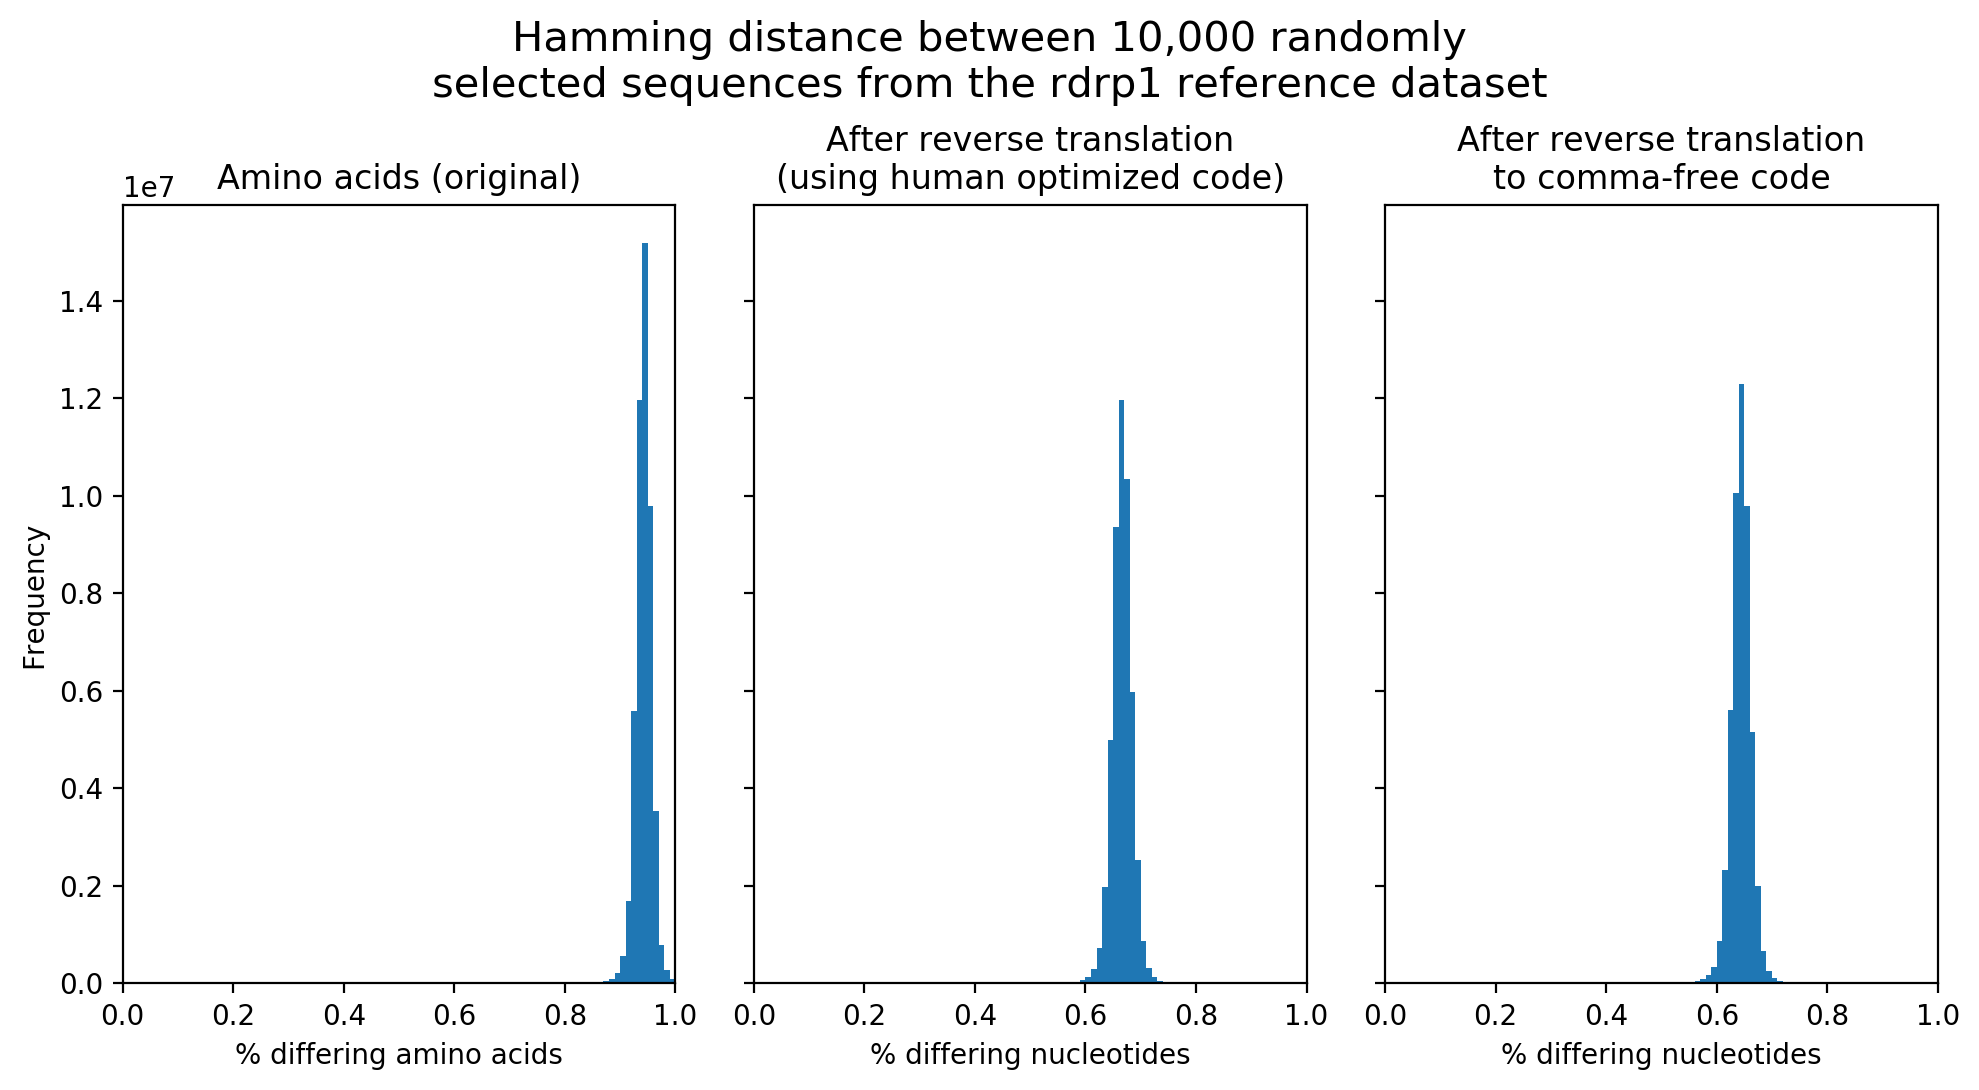

In [37]:
# # Plot Hamming distances    
# fig, axs = plt.subplots(figsize=(10,5), ncols=3, sharey=True)

# fig.suptitle(f"Hamming distance between {n:,} randomly\nselected sequences from the rdrp1 reference dataset", fontsize=15, y=1.08)

# ax=axs[0]
# ax.hist(dist_perc, 100)
# ax.set_title(f"Amino acids (original)")
# ax.set_xlabel("% differing amino acids")
# ax.set_ylabel("Frequency")
# ax.set_xlim(0,1.0)

# ax=axs[1]
# ax.hist(dist_perc_nn, 100)
# ax.set_title(f"After reverse translation\n(using human optimized code)")
# ax.set_xlabel("% differing nucleotides")
# # ax.set_ylabel("Frequency")
# ax.set_xlim(0,1.0)

# ax=axs[2]
# ax.hist(dist_perc_cfc, 100)
# ax.set_title(f"After reverse translation\nto comma-free code")
# ax.set_xlabel("% differing nucleotides")
# # ax.set_ylabel("Frequency")
# ax.set_xlim(0,1.0)

# plt.tight_layout()

# fig.savefig("rdrp_dists.png", dpi=300, bbox_inches="tight")

# fig.show()

### Build dna and gtf files

In [22]:
path_to_folder = "../../Pachter_lab/comma-free/palmdb/2021-03-27_rdrp1"

In [23]:
# Remove extra details from IDs
print(ids[:2])
ids = [i.split(":", 1)[1] for i in ids]
print(ids[:2])
# Check that the IDs are still unique
print(len(ids) == len(set(ids)))

['dupl.Aspiviridae-1.culex_tritaeniorhynchus_aspiviridae_related_virus:BBQ04833', 'dupl.Birnaviridae-1.alternaria_alternata_botybirnavirus_1:QBZ78320', 'dupl.Birnaviridae-1.botrytis_cinerea_botybirnavirus_1:AYX40886', 'dupl.Birnaviridae-1.botrytis_porri_botybirnavirus_1:YP_006390636', 'dupl.Birnaviridae-1.ipomoea_aquatica_botybirnavirus:QKI28860', 'dupl.Birnaviridae-1.plasmopara_viticola_lesion_associated_botybirna_1:QGZ98417', 'dupl.Birnaviridae-1.plasmopara_viticola_lesion_associated_botybirna_2:QGZ98419', 'dupl.Birnaviridae-1.sclerotinia_sclerotiorum_botybirnavirus_1:YP_009141011', 'dupl.Birnaviridae-1.sclerotinia_sclerotiorum_botybirnavirus_2:AMT92139', 'dupl.Birnaviridae-1.soybean_leaf_associated_botybirnavirus_1:ALM62244']
['BBQ04833', 'QBZ78320', 'AYX40886', 'YP_006390636', 'QKI28860', 'QGZ98417', 'QGZ98419', 'YP_009141011', 'AMT92139', 'ALM62244']


In [25]:
source = "rdrp1"
genome_name = "CFCrdrp1"
genome_date = "2021-03-27"

with open(f"{path_to_folder}/cfc_{source}_annotation.gtf", "w") as gtf, open(
    f"{path_to_folder}/cfc_{source}_genome.fa", "w"
) as dna:

    # Add header lines to GTF
    gtf.write(
        f"#!genome-build {genome_name}.1\n#!genome-version {genome_name}\n#!genome-date {genome_date}\n#!genome-build-accession {genome_name}\n#!genebuild-last-updated {genome_date}\n")

    start = 1
    # chromosome = 1
    for cfc_seq, id_ in zip(cfc_seqs, ids):
        features = ["gene", "transcript", "exon", "CDS"]
        frames = [".", ".", ".", "0"]
        end = start  + len(cfc_seq)
        gene_id = id_

        for feature, frame in zip(features, frames):
            if feature == "gene":
                gtf.write(
                    f'{gene_id}\t{source}\t{feature}\t{start} {end} .\t+\t{frame}\tgene_id "{gene_id}"; gene_version "1"; gene_name "{gene_id}"; gene_source "palmdb"; gene_biotype "protein_coding";\n'
                    )
            if feature == "transcript":
                gtf.write(
                    f'{gene_id}\t{source}\t{feature}\t{start} {end} .\t+\t{frame}\tgene_id "{gene_id}"; gene_version "1"; transcript_id "{gene_id}T"; transcript_version "1"; gene_name "{gene_id}"; gene_source "palmdb"; gene_biotype "protein_coding"; transcript_name "{gene_id}"; transcript_source "palmdb"; transcript_biotype "protein_coding"; tag "CCDS"; ccds_id "CCDS{gene_id}"; tag "basic";\n'
                )
            if feature == "exon":
                gtf.write(
                    f'{gene_id}\t{source}\t{feature}\t{start} {end} .\t+\t{frame}\tgene_id "{gene_id}"; gene_version "1"; transcript_id "{gene_id}T"; transcript_version "1"; exon_number "1"; gene_name "{gene_id}"; gene_source "palmdb"; gene_biotype "protein_coding"; transcript_name "{gene_id}"; transcript_source "palmdb"; transcript_biotype "protein_coding"; tag "CCDS"; ccds_id "CCDS{gene_id}"; exon_id "{gene_id}E"; exon_version "1"; tag "basic";\n'
                )
            if feature == "CDS":
                gtf.write(
                    f'{gene_id}\t{source}\t{feature}\t{start} {end} .\t+\t{frame}\tgene_id "{gene_id}"; gene_version "1"; transcript_id "{gene_id}T"; transcript_version "1"; exon_number "1"; gene_name "{gene_id}"; gene_source "palmdb"; gene_biotype "protein_coding"; transcript_name "{gene_id}"; transcript_source "palmdb"; transcript_biotype "protein_coding"; tag "CCDS"; ccds_id "CCDS{gene_id}"; protein_id "{gene_id}P"; protein_version "1"; tag "basic";\n'
                    )

        # Build dna/genome file
        dna.write(f">{gene_id} dna:chromosome chromosome:{genome_name}:{gene_id}:{start}:{end}:1 REF\n")
        dna.write(f"{cfc_seq}\n")

#         # Add next PALM sequence to new chromosome
#         chromosome += 1

Create t2g (run from terminal in same folder):

In [ ]:
# # Get the ID after the ">"
# !cat cfc_rdrp1_genome.fa | awk '{if($1~">") print $1"\t"$1}' > cfc_rdrp1_t2g.txt
# # Remove the ">"
# !sed -i'.original' 's/>//g' cfc_rdrp1_t2g.txt
# !rm cfc_rdrp1_t2g.txt.original

## Build index and bus file

In [ ]:
# # Generate index with kb (DOES NOT WORK - DELANEY SAYS HE HAS THE SAME PROBLEM WITH KB REF)
# !kb ref \
#     -i $path_to_folder/kb/cfc_rdrp1_kb_index.idx \
#     -g $path_to_folder/kb/cfc_rdrp1_t2g.txt \
#     -f1 $path_to_folder/kb/cfc_rdrp1_transcriptome.fa \
#     $path_to_folder/cfc_rdrp1_genome.fa \
#     $path_to_folder/cfc_rdrp1_annotation.gtf

In [26]:
# Generate kallisto index
!kallisto index \
    -t 2 \
    -i $path_to_folder/cfc_rdrp1_index.idx \
    $path_to_folder/cfc_rdrp1_genome.fa


[build] loading fasta file ../../Pachter_lab/comma-free/palmdb/2021-03-27_rdrp1/cfc_rdrp1_genome.fa
[build] k-mer length: 31
[build] warning: replaced 5085 non-ACGUT characters in the input sequence
        with pseudorandom nucleotides
KmerStream::KmerStream(): Start computing k-mer cardinality estimations (1/2)
KmerStream::KmerStream(): Start computing k-mer cardinality estimations (1/2)
KmerStream::KmerStream(): Finished
CompactedDBG::build(): Estimated number of k-mers occurring at least once: 15811289
CompactedDBG::build(): Estimated number of minimizer occurring at least once: 3671370
CompactedDBG::filter(): Processed 18813552 k-mers in 14680 reads
CompactedDBG::filter(): Found 15766251 unique k-mers
CompactedDBG::filter(): Number of blocks in Bloom filter is 108086
CompactedDBG::construct(): Extract approximate unitigs (1/2)
CompactedDBG::construct(): Extract approximate unitigs (2/2)
CompactedDBG::construct(): Closed all input files

CompactedDBG::construct(): Splitting unitig